In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("batting.csv")

#2015 data ab>200
df_2015 = df[(df['year'] == 2015) & (df['ab'] > 200)]

# fill na w 0
df_2015.fillna({'hr': 0, 'so': 0, 'bb': 0, 'sf': 0, 'h': 0, 'double': 0, 'triple': 0}, inplace=True)

# rename hits based on base
df_2015['single'] = df_2015['h'] - (df_2015['double'] + df_2015['triple'] + df_2015['hr'])

# creating metrics
df_2015['HR_rate'] = df_2015['hr'] / df_2015['ab']
df_2015['SO_rate'] = df_2015['so'] / df_2015['ab']
df_2015['BB_rate'] = df_2015['bb'] / (df_2015['ab'] + df_2015['bb'] + df_2015['sf'])
df_2015['OBP'] = (df_2015['h'] + df_2015['bb']) / (df_2015['ab'] + df_2015['bb'] + df_2015['sf'])
df_2015['SLG'] = (
    df_2015['single'] + 2*df_2015['double'] + 3*df_2015['triple'] + 4*df_2015['hr']
) / df_2015['ab']

# clustering stats
df_cluster = df_2015[['player_id', 'HR_rate', 'SO_rate', 'BB_rate', 'OBP', 'SLG']].dropna()
# standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_cluster.drop('player_id', axis=1))


df_cluster.head()


/tmp/ipykernel_9033/2616058223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015.fillna({'hr': 0, 'so': 0, 'bb': 0, 'sf': 0, 'h': 0, 'double': 0, 'triple': 0}, inplace=True)
/tmp/ipykernel_9033/2616058223.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['single'] = df_2015['h'] - (df_2015['double'] + df_2015['triple'] + df_2015['hr'])
/tmp/ipykernel_9033/2616058223.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,player_id,HR_rate,SO_rate,BB_rate,OBP,SLG
99848,abreujo02,0.048940,0.228385,0.059724,0.332312,0.502447
99859,ahmedni01,0.021378,0.192399,0.064018,0.273731,0.358670
99870,alonsyo01,0.014124,0.135593,0.105263,0.355890,0.381356
99872,altuvjo01,0.023511,0.105016,0.048744,0.344165,0.459248
99877,alvarpe01,0.061785,0.299771,0.098160,0.314928,0.469108


/home/mpritch1/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpritch1/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpritch1/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpritch1/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

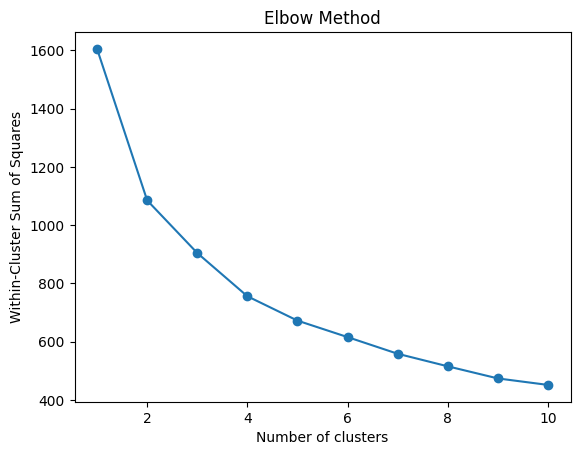

In [4]:
##Elbow method opitmal K
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

#plot
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method')
plt.show()


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(features_scaled)

df_cluster['cluster'] = labels

df_cluster


/home/mpritch1/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,player_id,HR_rate,SO_rate,BB_rate,OBP,SLG,cluster
99848,abreujo02,0.048940,0.228385,0.059724,0.332312,0.502447,2
99859,ahmedni01,0.021378,0.192399,0.064018,0.273731,0.358670,3
99870,alonsyo01,0.014124,0.135593,0.105263,0.355890,0.381356,1
99872,altuvjo01,0.023511,0.105016,0.048744,0.344165,0.459248,1
99877,alvarpe01,0.061785,0.299771,0.098160,0.314928,0.469108,0
...,...,...,...,...,...,...,...
101320,youngch04,0.044025,0.229560,0.085714,0.314286,0.452830,2
101326,zimmery01,0.046243,0.228324,0.084833,0.305913,0.465318,2
101328,zobribe01,0.025532,0.110638,0.121771,0.354244,0.446809,1
101329,zobribe01,0.030172,0.129310,0.110266,0.361217,0.452586,1


In [8]:
# group hitters by cluster
cluster_summary = df_cluster.groupby('cluster')[['HR_rate', 'SO_rate', 'BB_rate', 'OBP', 'SLG']].mean().round(3)

cluster_counts = df_cluster['cluster'].value_counts().sort_index()
cluster_summary['count'] = cluster_counts
cluster_summary = cluster_summary.reset_index()

print(cluster_summary)


   cluster  HR_rate  SO_rate  BB_rate    OBP    SLG  count
0        0    0.057    0.269    0.119  0.356  0.508     48
1        1    0.027    0.171    0.084  0.344  0.437     82
2        2    0.037    0.257    0.069  0.299  0.421    106
3        3    0.014    0.183    0.061  0.292  0.345     85


In [9]:
#label clusters based on hitting types
def label_cluster(row):
    if row['HR_rate'] > 0.05 and row['SLG'] > 0.5:
        return 'Power Hitters'
    elif row['OBP'] > 0.34 and row['SO_rate'] < 0.20:
        return 'Contact Hitters'
    elif row['BB_rate'] > 0.09:
        return 'Disciplined Sluggers'
    else:
        return 'Free Swingers'

cluster_summary['Label'] = cluster_summary.apply(label_cluster, axis=1)
print(cluster_summary[['cluster', 'Label']])


   cluster            Label
0        0    Power Hitters
1        1  Contact Hitters
2        2    Free Swingers
3        3    Free Swingers


In [10]:
#top 10 players in each cluster
for i in range(4):
    print(f"\nCluster {i} – {cluster_summary.loc[i, 'Label']}")
    display(df_cluster[df_cluster['cluster'] == i][['player_id', 'HR_rate', 'SO_rate', 'BB_rate', 'OBP', 'SLG']].head(10))



Cluster 0 – Power Hitters


,player_id,HR_rate,SO_rate,BB_rate,OBP,SLG
99877,alvarpe01,0.061785,0.299771,0.098160,0.314928,0.469108
99891,arenano01,0.068182,0.178571,0.051437,0.319213,0.574675
99935,bautijo02,0.073665,0.195212,0.166415,0.372163,0.535912
99948,beltbr01,0.036585,0.298780,0.101449,0.351449,0.477642
99991,bradlja02,0.045249,0.312217,0.107570,0.326693,0.497738
99994,braunry02,0.049407,0.227273,0.095915,0.351687,0.498024
100012,bryankr01,0.046512,0.355993,0.120125,0.360374,0.488372
100036,cabremi01,0.041958,0.191142,0.151575,0.437008,0.533800
100058,carpema01,0.048780,0.263066,0.122914,0.359636,0.505226
100062,cartech02,0.061381,0.386189,0.125828,0.298013,0.427110



Cluster 1 – Contact Hitters


,player_id,HR_rate,SO_rate,BB_rate,OBP,SLG
99870,alonsyo01,0.014124,0.135593,0.105263,0.355890,0.381356
99872,altuvjo01,0.023511,0.105016,0.048744,0.344165,0.459248
99887,aokino01,0.014085,0.070423,0.077922,0.342857,0.380282
99949,beltrad01,0.031746,0.114638,0.066558,0.331169,0.453263
99950,beltrca01,0.039749,0.177824,0.085066,0.334594,0.470711
99959,bettsmo01,0.030151,0.137353,0.070878,0.338983,0.479062
99963,blackch02,0.027687,0.182410,0.069277,0.334337,0.449511
99965,blancan01,0.030043,0.188841,0.082677,0.350394,0.502146
99966,blancgr01,0.015291,0.180428,0.108108,0.364865,0.412844
99975,bogaexa01,0.011419,0.164763,0.049383,0.351852,0.420881



Cluster 2 – Free Swingers


,player_id,HR_rate,SO_rate,BB_rate,OBP,SLG
99848,abreujo02,0.048940,0.228385,0.059724,0.332312,0.502447
99897,ascheco01,0.028235,0.261176,0.057522,0.287611,0.395294
99940,beckhti01,0.044335,0.339901,0.059091,0.263636,0.428571
99981,bourju01,0.056235,0.246944,0.076577,0.317568,0.479218
100011,bruceja01,0.044828,0.250000,0.089645,0.292117,0.434483
100028,butlejo04,0.031128,0.319066,0.058608,0.318681,0.416342
100030,byrdma01,0.052925,0.281337,0.059740,0.280519,0.448468
100033,cabreas01,0.029703,0.211881,0.065814,0.310786,0.429703
100042,calhoko01,0.041270,0.260317,0.066274,0.303387,0.422222
100049,canhama01,0.036281,0.217687,0.069182,0.303983,0.426304



Cluster 3 – Free Swingers


,player_id,HR_rate,SO_rate,BB_rate,OBP,SLG
99859,ahmedni01,0.021378,0.192399,0.064018,0.273731,0.358670
99879,amarial01,0.009259,0.169753,0.067989,0.254958,0.287037
99885,andruel01,0.011745,0.130872,0.070661,0.307220,0.357383
99905,avilemi01,0.017241,0.131034,0.064309,0.279743,0.317241
99908,aybarer01,0.005025,0.122278,0.039872,0.296651,0.338358
99920,barmecl01,0.014493,0.265700,0.046083,0.267281,0.352657
99922,barnebr02,0.007843,0.262745,0.075812,0.306859,0.341176
99926,barnhtu01,0.012397,0.185950,0.092593,0.318519,0.326446
99939,beckhgo01,0.028436,0.203791,0.081197,0.269231,0.331754
99982,bournmi01,0.000000,0.262976,0.090909,0.313480,0.294118


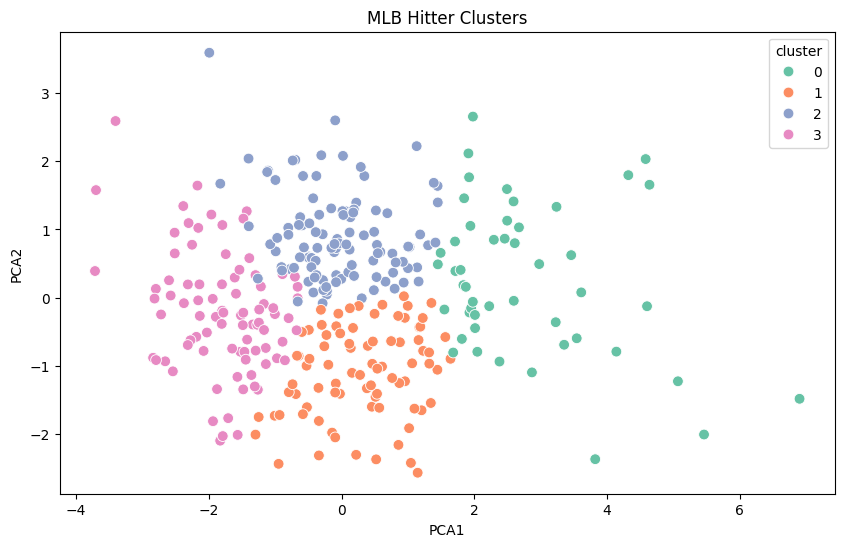

In [11]:
##PCA Plot

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)


df_cluster['PCA1'] = pca_result[:, 0]
df_cluster['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=60)
plt.title('MLB Hitter Clusters')

plt.show()
